#Exploratory Data Analysis (EDA) for Employee Retention Analysis

Import all the neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset and create dataframe to read dataset

In [32]:
df=pd.read_csv('hr_employee_churn_data.csv')

Check the dataframe and its data

In [3]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


Display dataset info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


Check dataset dimensions

In [5]:
df.shape

(14999, 10)

Overview of data distribution

In [6]:
df.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Checking unique values in 'Work_accident'

In [7]:
df['Work_accident'].unique()

array([0, 1])

Checking unique values in 'promotion_last_5years'

In [8]:
df['promotion_last_5years'].unique()

array([0, 1])

Checking employee distribution based on 'left'

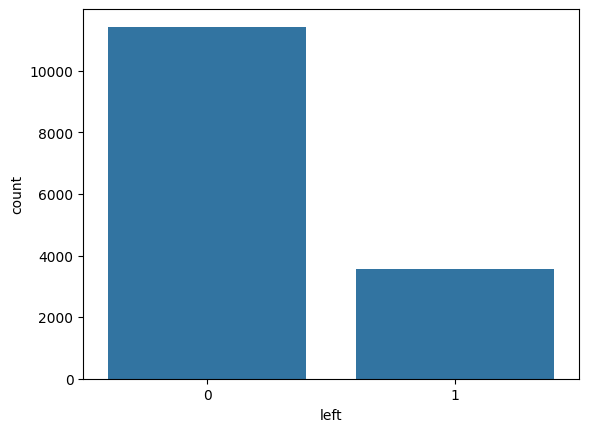

In [9]:
sns.countplot(x='left',data=df)
plt.show()

Observation -The training set has more employees who stayed than those who left, suggesting an imbalance in the data.

Checking distribution of 'salary' feature

<Axes: xlabel='salary', ylabel='count'>

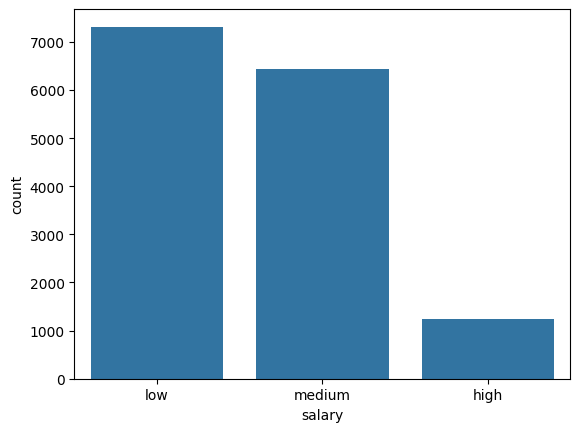

In [10]:
sns.countplot(x='salary', data=df)

Observation :The dataset contains a higher count of low-salaried employees,

Checking employee churn ('left') distribution across salary levels

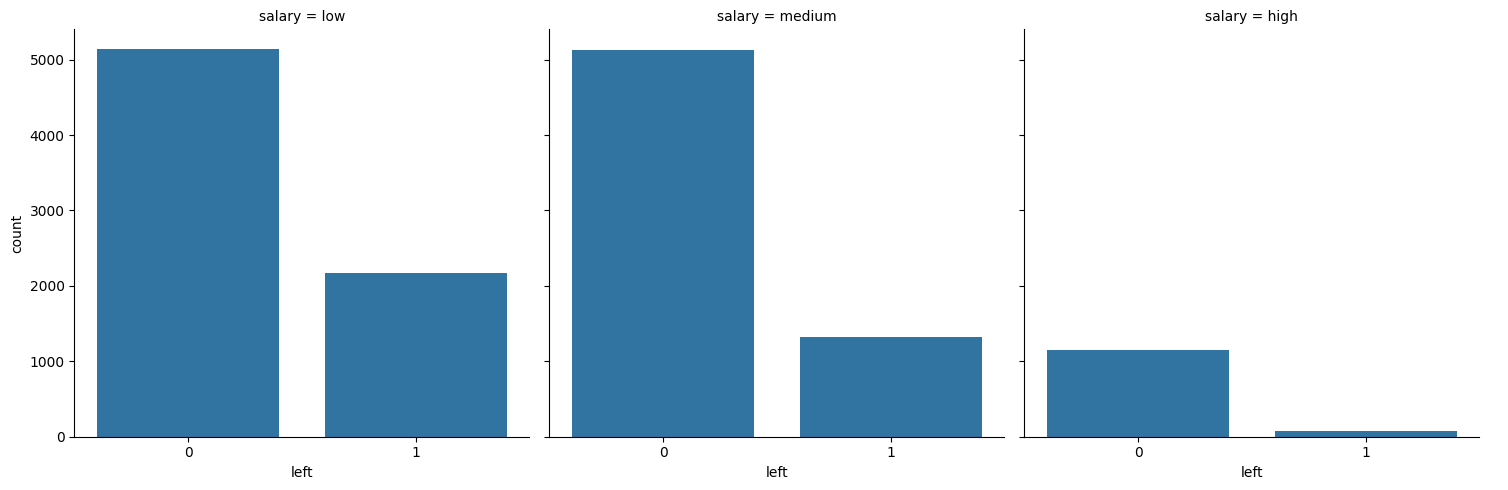

In [11]:
sns.catplot(x='left', col='salary', kind='count', data=df);

Observation :It appears that employees with lower salaries have a higher churn rate, indicating they are more likely to leave the company.

Checking distribution of 'promotion_last_5years' feature

<Axes: xlabel='promotion_last_5years', ylabel='count'>

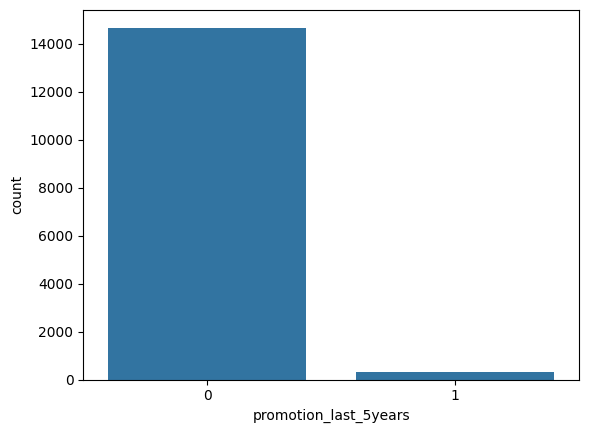

In [12]:
sns.countplot(x='promotion_last_5years', data=df)

Observation: The dataset shows a higher number of employees who have not received a promotion in the last 5 years.

Analyzing employee churn ('left') based on promotion status over the last 5 years.

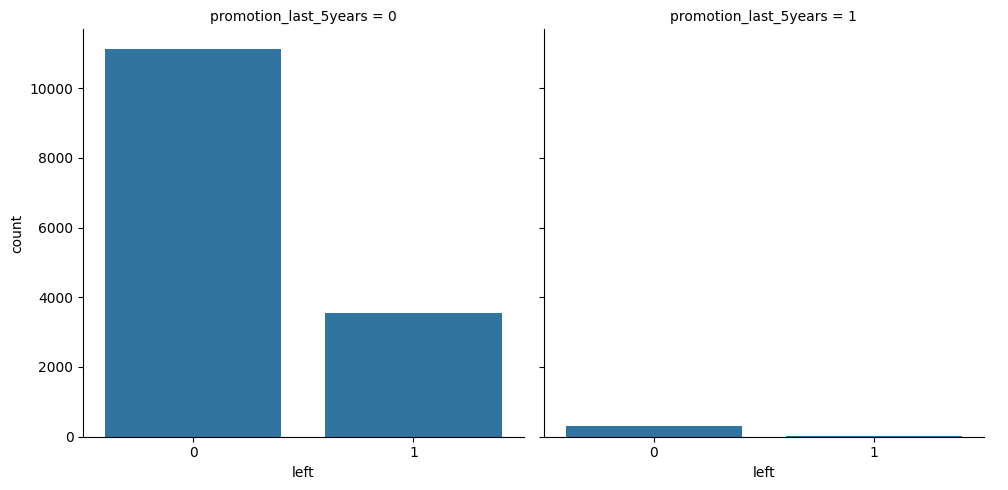

In [13]:
sns.catplot(x='left', col='promotion_last_5years', kind='count', data=df);

Observation: Non-promoted employees seem to have a higher likelihood of leaving the company.

Analyzing distribution of 'Work_accident' feature

<Axes: xlabel='Work_accident', ylabel='count'>

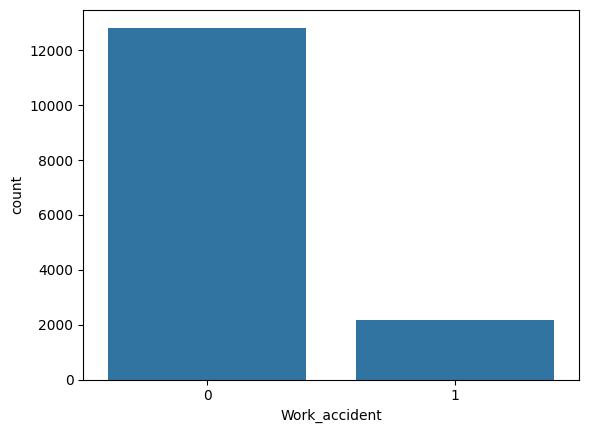

In [14]:
sns.countplot(x='Work_accident', data=df)

Observation: The dataset shows a lower number of employees who have experienced a work accident.

Analyzing employee churn ('left') based on work accident status

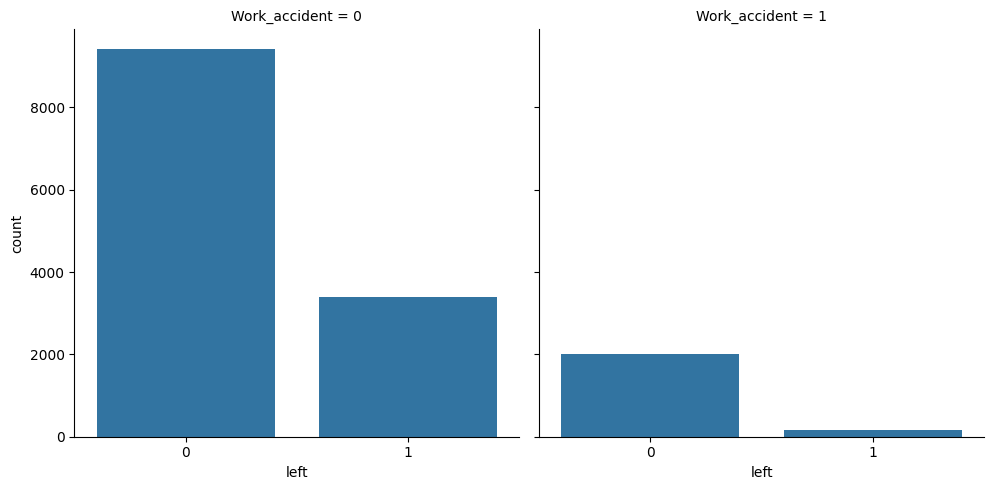

In [15]:
sns.catplot(x='left', col='Work_accident', kind='count', data=df);


Observation: Employees who did not experience a work accident seem to have a higher likelihood of leaving, indicating that 'Work_accident' may not be a strong factor in predicting employee churn.

Plotting univariate distribution of 'satisfaction_level'

<ipython-input-16-09432cc61739>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['satisfaction_level'])


<Axes: xlabel='satisfaction_level', ylabel='Density'>

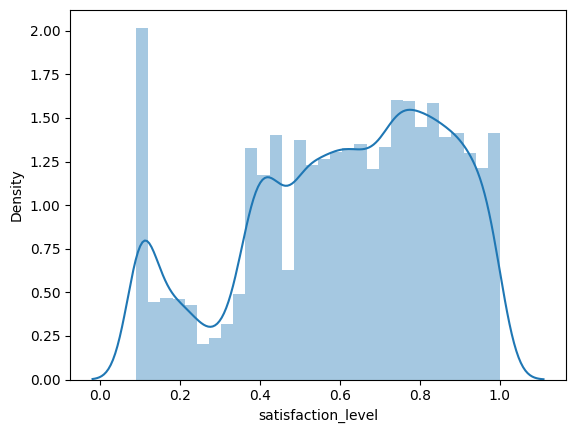

In [16]:
sns.distplot(df['satisfaction_level'])

Observation: The satisfaction level ranges from 0.1 to 1, with most employees reporting very low satisfaction (around 0.1).

Box plot showing satisfaction level distribution based on employee churn ('left')

<Axes: xlabel='left', ylabel='satisfaction_level'>

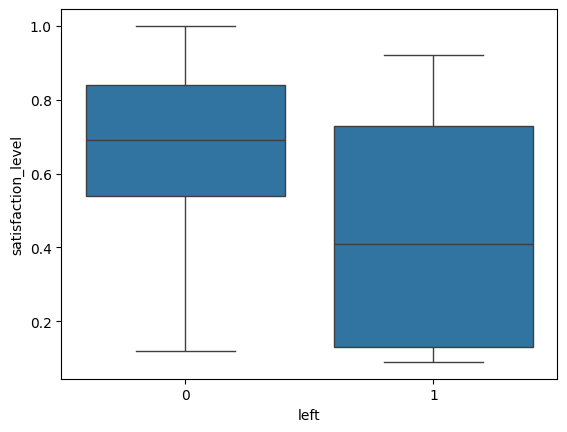

In [17]:
sns.boxplot(x="left", y= "satisfaction_level", data=df)

Observation: Employees who left the company tend to have lower satisfaction levels, mostly ranging from 0.2 to 0.5.

Plotting univariate distribution of 'number_project'

<ipython-input-18-7211759b9b3f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['number_project'])


<Axes: xlabel='number_project', ylabel='Density'>

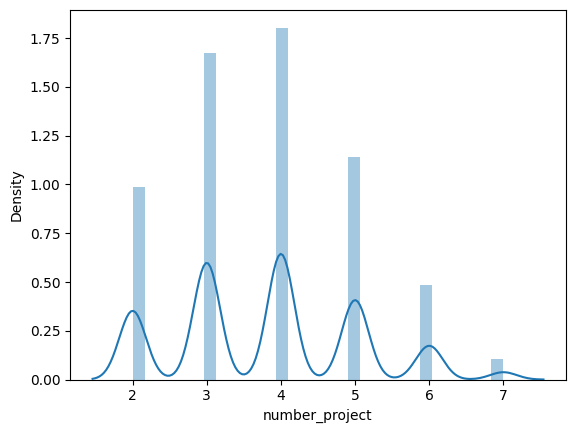

In [18]:
sns.distplot(df['number_project'])

Observation: The number of projects ranges from 2 to 7, with most employees working on 4 projects.




Box plot showing project count distribution based on employee churn ('left')

<Axes: xlabel='left', ylabel='number_project'>

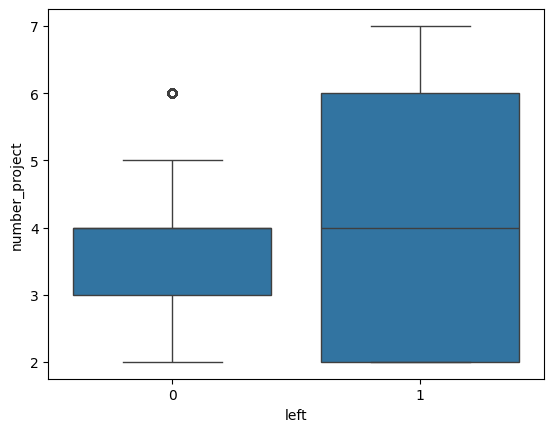

In [19]:
sns.boxplot(x="left", y= "number_project", data=df)

Observation: Employees who left the company often had more projects, while those who stayed usually had between 3 to 4 projects.

Plotting univariate distribution of 'last_evaluation'

<ipython-input-20-460c80949fd7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['last_evaluation'])


<Axes: xlabel='last_evaluation', ylabel='Density'>

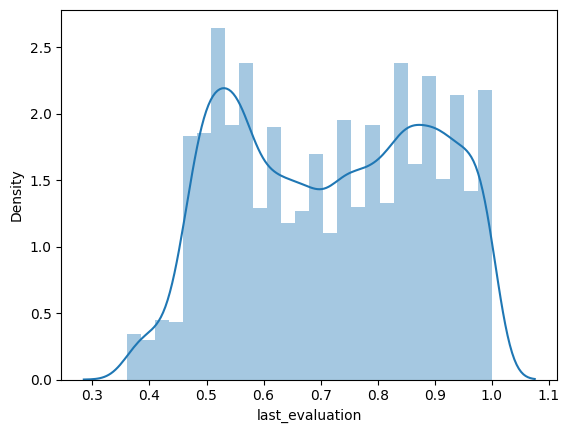

In [20]:
sns.distplot(df['last_evaluation'])

Observation: The last evaluation scores range from 0.35 to 1, with most employees having a score around 0.55.

Box plot showing last evaluation distribution based on employee churn ('left')

<Axes: xlabel='left', ylabel='last_evaluation'>

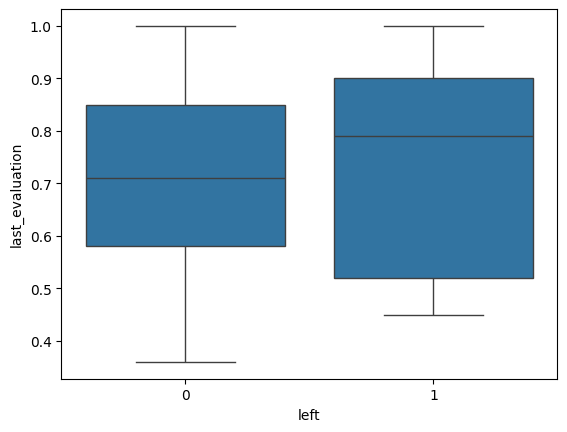

In [21]:
sns.boxplot(x="left", y= "last_evaluation", data=df)

 Observstion :Employees who left generally had higher last evaluation scores, although the impact seems not significant.

Plotting univariate distribution of 'average_monthly_hours'

<ipython-input-22-381bf19edfb7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_montly_hours'])


<Axes: xlabel='average_montly_hours', ylabel='Density'>

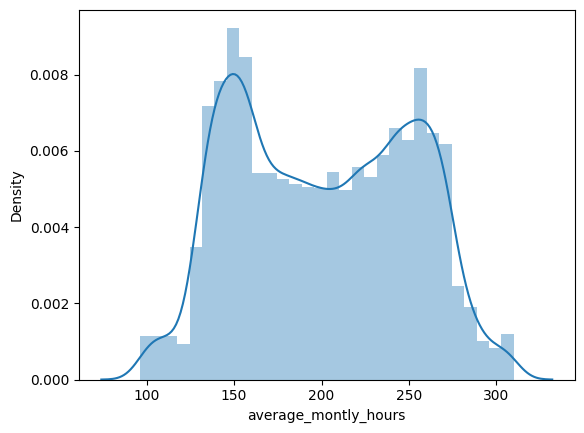

In [22]:
sns.distplot(df['average_montly_hours'])

Observation: The average monthly hours range from 100 to 300, with most employees working around 150 hours.

Box plot showing average monthly hours distribution based on employee churn ('left')

<Axes: xlabel='left', ylabel='average_montly_hours'>

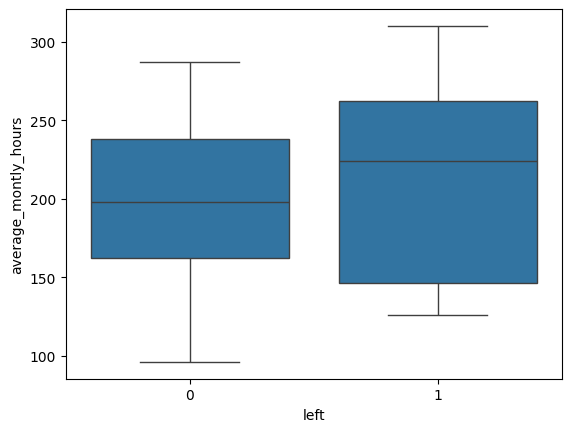

In [23]:
sns.boxplot(x="left", y= "average_montly_hours", data=df)

Observation: Employees who left the company tend to have higher average monthly hours.

Plotting univariate distribution of 'time_spend_company'

<ipython-input-24-effaf663a140>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['time_spend_company'])


<Axes: xlabel='time_spend_company', ylabel='Density'>

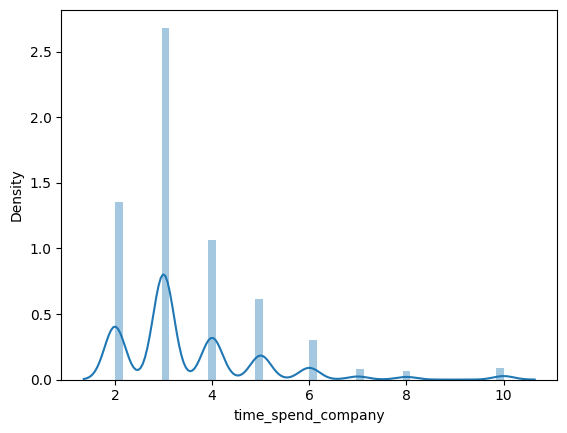

In [24]:
sns.distplot(df['time_spend_company'])

Observation: Most employees have spent around 3 years at the company, with fewer employees staying for 9 years, as the time spent ranges from 2 to 10 years.

Box plot showing time spent in the company distribution based on employee churn ('left')

<Axes: xlabel='left', ylabel='time_spend_company'>

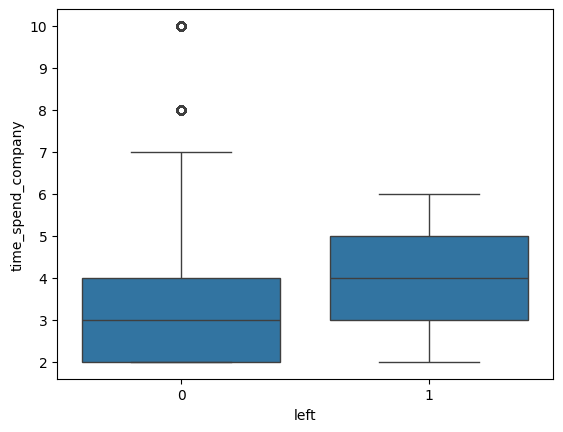

In [25]:
sns.boxplot(x="left", y= "time_spend_company", data=df)

Observation: Employees who left the company tend to have spent more time in the company.

Mapping salary categories to numeric values and plotting correlation matrix heatmap

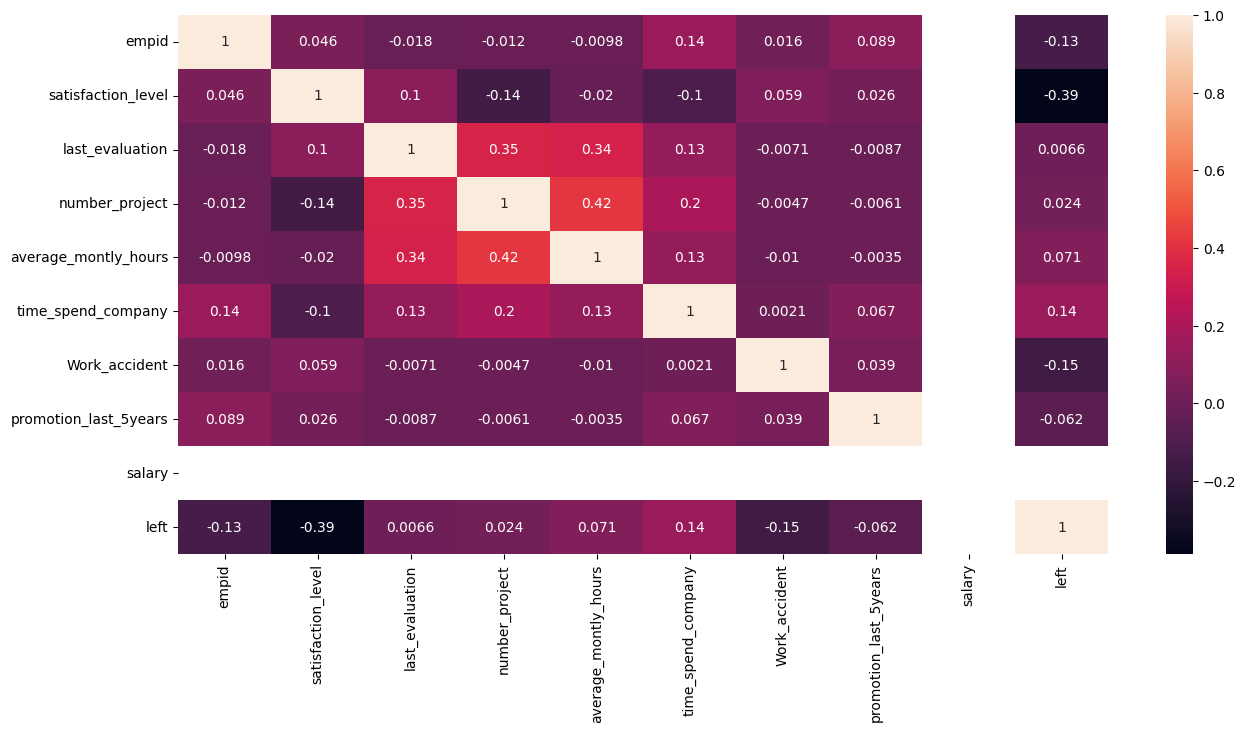

In [30]:
df['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})
cor_mat = df.corr()
fig = plt.figure(figsize=(15, 7))
sns.heatmap(cor_mat, annot=True)
plt.show()


Observation: The correlation heatmap displays the relationships between numeric features after encoding the 'salary' column, providing insights into how different features are interrelated.

Plotting pairwise relationships in the dataset using a pairplot

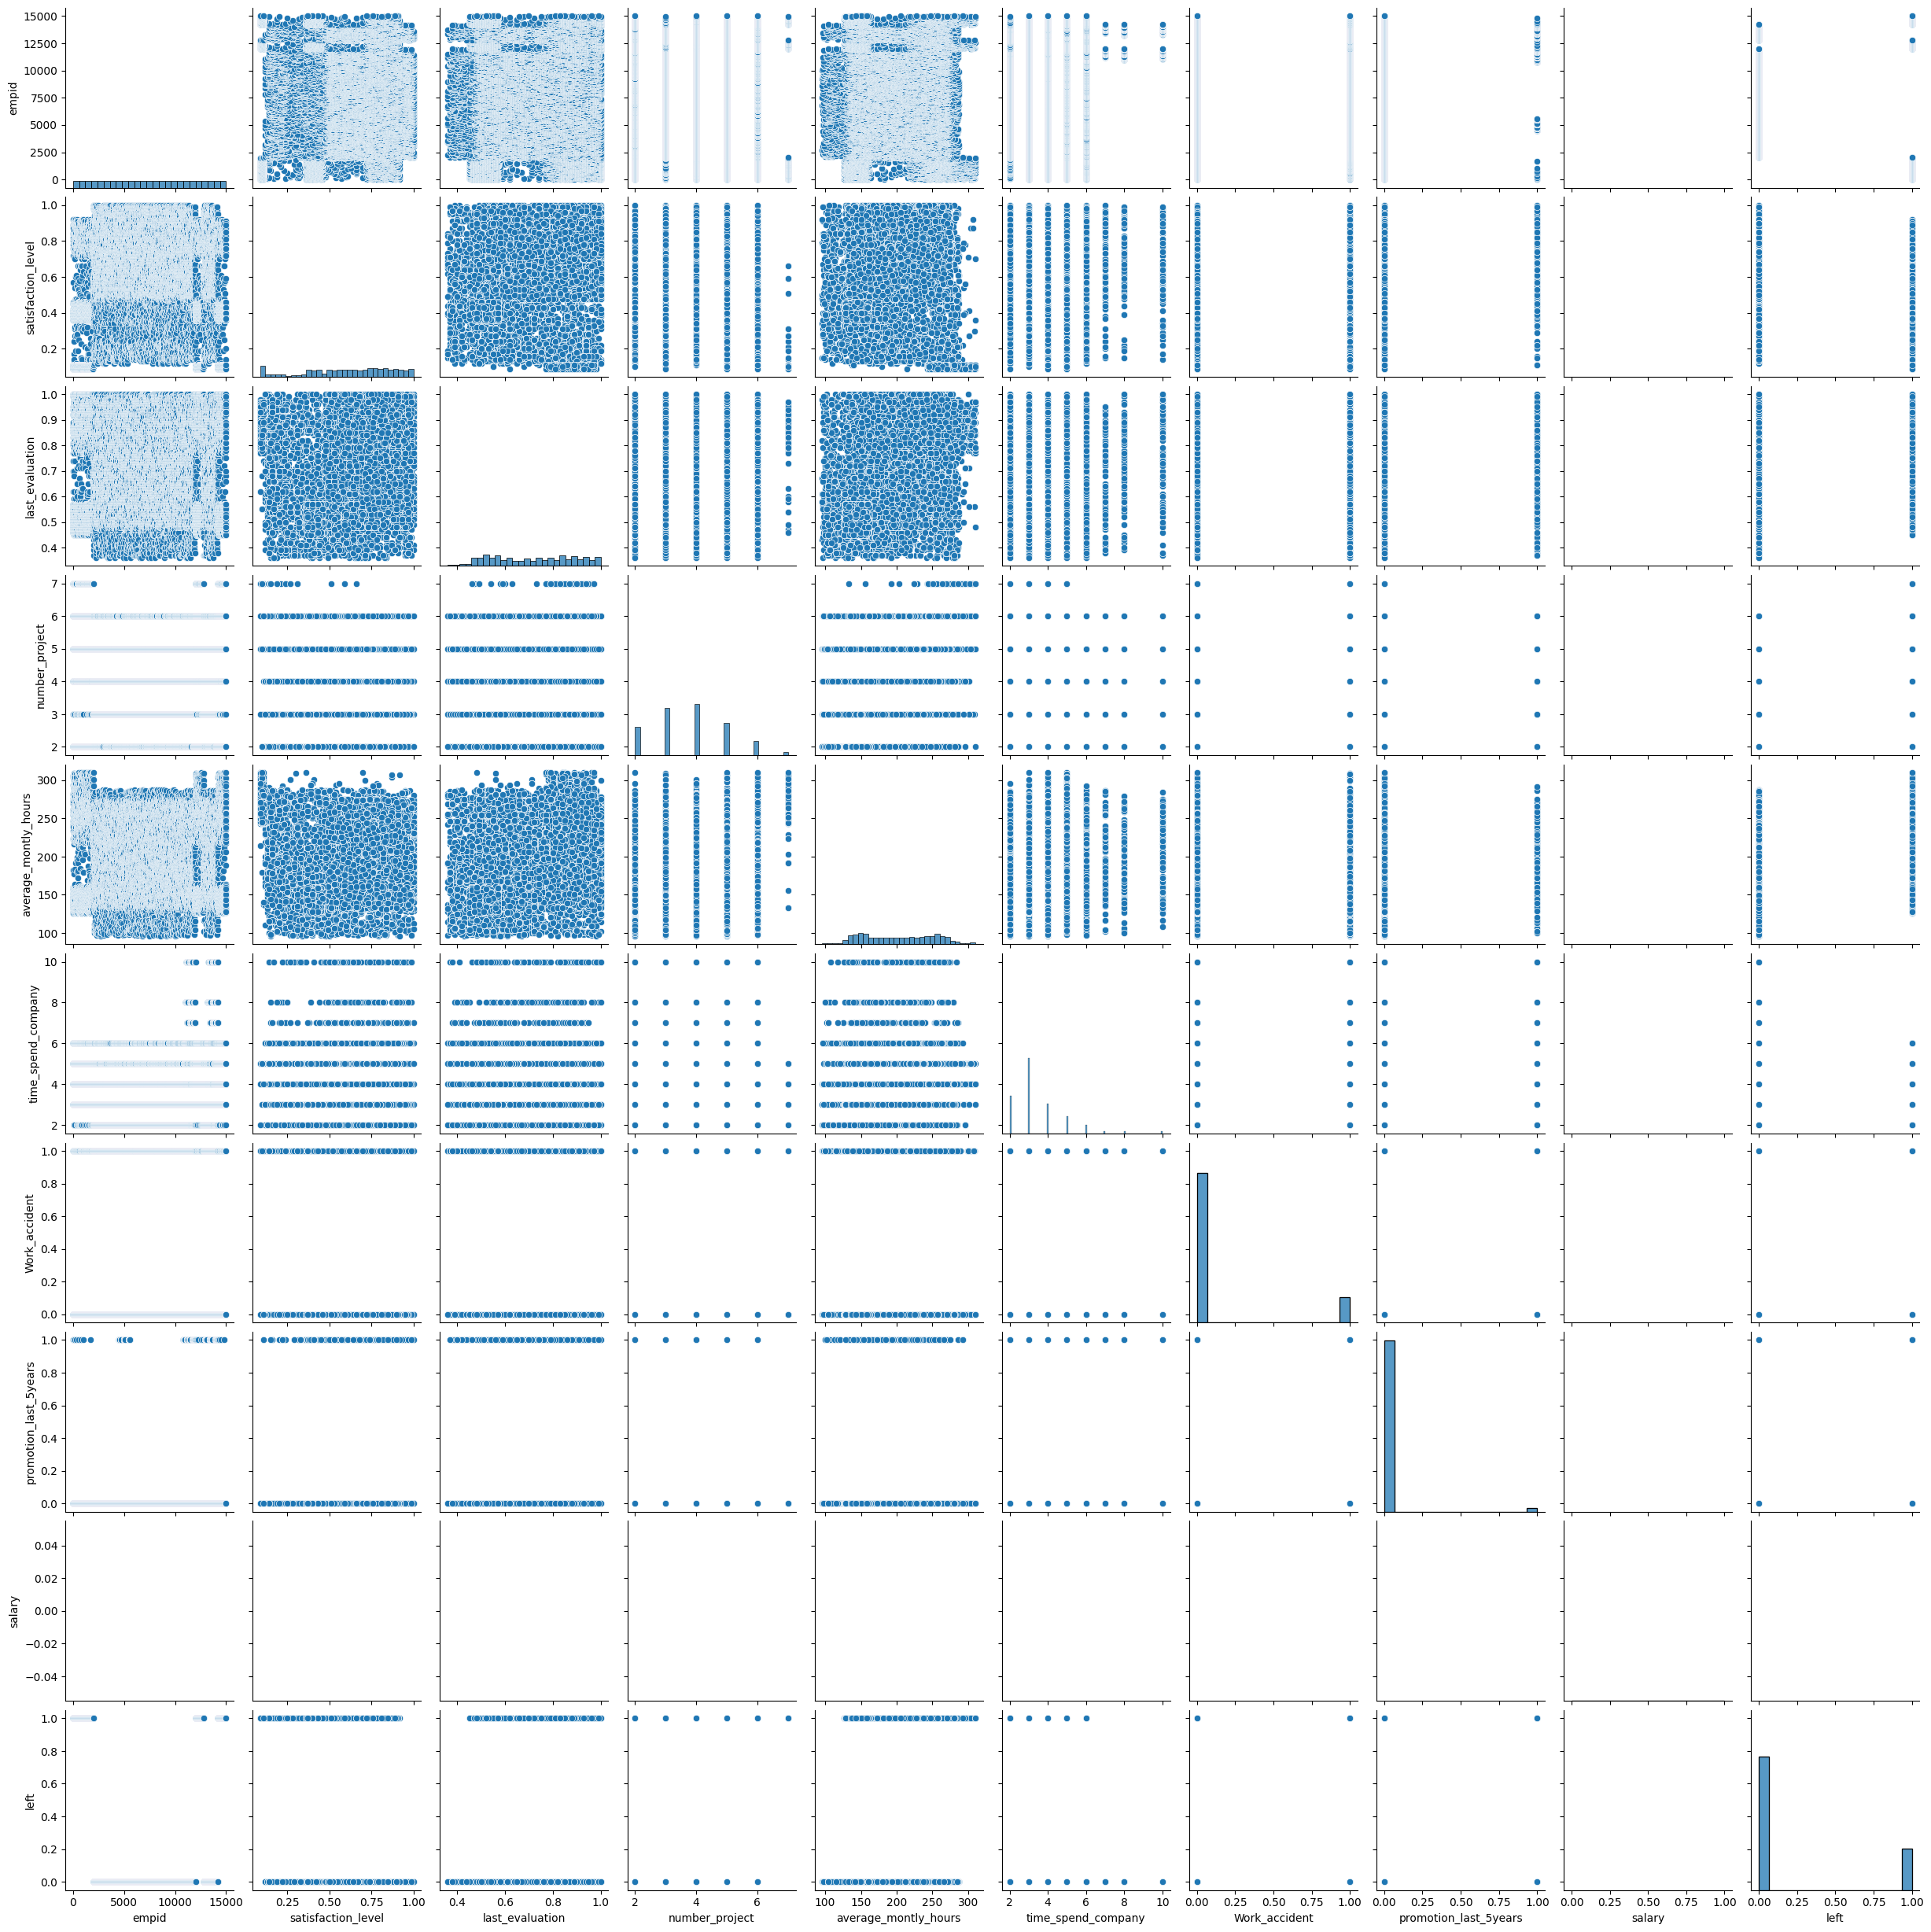

In [31]:
sns.pairplot(df)

 The pairplot visualizes the relationships between multiple numeric features, helping to identify patterns or correlations between them.